## 3-10. 네이버의 영화 평점 기준 영화의 평점 변화 확인하기

* https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220116

In [1]:
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
from urllib.request import urlopen, Request

url = Request('https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220116', headers={'User-Agent': 'Mozilla/5.0'})

page = urlopen(url)

soup = BeautifulSoup(page, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20220116" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

In [6]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=187320" title="씽2게더">씽2게더</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=201073" title="코다">코다</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=19031" title="러브레터">러브레터</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=27350" title="기쿠지로의 여름">기쿠지로의 여름</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=208077" title="스파이더맨: 노 웨이 홈">스파이더맨: 노 웨이 홈</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=32588" title="아멜리에">아멜리에</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=31607" title="고양이를 부탁해">고양이를 부탁해</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=192614" title="돈 룩 업">돈 룩 업</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=205623" title="드라이브 마이 카">드라이브 마이 카</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=186233" tit

In [7]:
soup.find_all('div', 'tit5')[0].a.string

'씽2게더'

In [8]:
soup.find_all('td', 'point')[0].string

'9.44'

* 날짜를 6월 1일부터 100일간으로 정의하고 그 날짜에 해당하는 영화 정보 전체를 찾기

In [10]:
date = pd.date_range('2021-6-1', periods=100, freq='D')
date

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20',
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
               '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
               '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
               '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22',
               '2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
      

In [11]:
import urllib
from tqdm import tqdm_notebook

movie_date, movie_name, movie_point = [], [], []

for today in tqdm_notebook(date):
    html = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={date}'
    url = Request(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))), headers={'User-Agent': 'Mozilla/5.0'})
    page = urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')

    end = len(soup.find_all('td', 'point'))

    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

/var/folders/_p/x_57820s1b15kl1dk8sw72kc0000gn/T/ipykernel_11974/1576152348.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for today in tqdm_notebook(date):


  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
movie = pd.DataFrame({'date': movie_date, 'name': movie_name, 'point': movie_point})
movie['point'] = movie['point'].astype(float)
movie.head()

,date,name,point
0,2021-06-01,아일라,9.50
1,2021-06-01,크루엘라,9.47
2,2021-06-01,언플랜드,9.33
3,2021-06-01,소울,9.31
4,2021-06-01,부활: 그 증거,9.30


* aggfunc로 np.sum을 이용해서 합산하기

In [13]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
너의 췌장을 먹고 싶어,965.39
크루엘라,917.69
중경삼림,892.22
화양연화,877.11
극장판 귀멸의 칼날: 무한열차편,853.96


In [15]:
tmp = movie.query('name == ["크루엘라"]')
tmp

,date,name,point
1,2021-06-01,크루엘라,9.47
49,2021-06-02,크루엘라,9.47
94,2021-06-03,크루엘라,9.46
139,2021-06-04,크루엘라,9.45
188,2021-06-05,크루엘라,9.42
...,...,...,...
4206,2021-09-03,크루엘라,9.23
4256,2021-09-04,크루엘라,9.23
4305,2021-09-05,크루엘라,9.23
4356,2021-09-06,크루엘라,9.23


* 날짜별 평점의 변화 확인하기

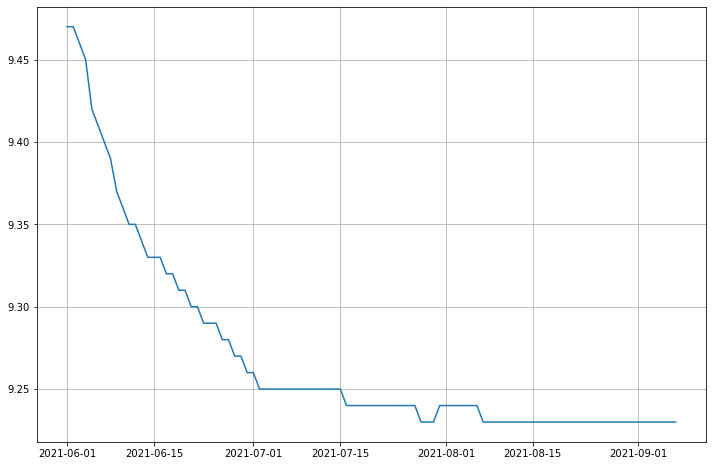

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.plot(tmp['date'], tmp['point'])
plt.grid()
plt.show()

## 3-11. 영화별 날짜 변화에 따른 평점 변화 확인하기

In [18]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])

movie_pivot.head()

point                                                              \
name       13 구역 47 미터 500일의 썸머 69세 U-571 간츠: 오  강변호텔 걸어도 걸어도 고질라 VS. 콩 괴기맨숀   
date                                                                           
2021-06-01   NaN   NaN     8.43 NaN   NaN   NaN   NaN     NaN       NaN  NaN   
2021-06-02   NaN   NaN     8.43 NaN   NaN   NaN  5.96     NaN       NaN  NaN   
2021-06-03   NaN   NaN     8.43 NaN   NaN   NaN  5.96     NaN       NaN  NaN   
2021-06-04   NaN   NaN     8.43 NaN   NaN   NaN  5.97     NaN       NaN  NaN   
2021-06-05   NaN   NaN     8.43 NaN   NaN   NaN  5.97     NaN       NaN  NaN   

            ...                                                               \
name        ... 하나와 앨리스 하하하 한여름의 판타지아 해리 포터와 마법사의 돌 해피 투게더 혐오스런 마츠코의 일생 호우시절   
date        ...                                                                
2021-06-01  ...     NaN NaN       NaN           NaN   9.19          NaN  NaN   
2021-06-02  ...     NaN NaN       NaN           NaN   9.19          NaN  NaN   
2021-06-03  ...     NaN NaN      7.81           NaN   9.19          NaN  NaN   
2021-06-04  ...     NaN NaN      7.81           NaN   9.19          NaN  NaN   
2021-06-05  ...     NaN NaN      7.80           NaN   9.19          NaN  NaN   

                                  
name       홀리 모터스  화양연화 흐르는 강물처럼  
date                              
2021-06-01    NaN  8.78      NaN  
2021-06-02    NaN  8.78      NaN  
2021-06-03    NaN  8.78      NaN  
2021-06-04    NaN  8.78      NaN  
2021-06-05    NaN  8.78      NaN  

[5 rows x 189 columns]

* droplevel() : 요청된 인덱스/열 수준이 제거된 series/dataframe 반환

In [19]:
movie_pivot.columns = movie_pivot.columns.droplevel()

movie_pivot.head()

name,13 구역,47 미터,500일의 썸머,69세,U-571,간츠: 오,강변호텔,걸어도 걸어도,고질라 VS. 콩,괴기맨숀,...,하나와 앨리스,하하하,한여름의 판타지아,해리 포터와 마법사의 돌,해피 투게더,혐오스런 마츠코의 일생,호우시절,홀리 모터스,화양연화,흐르는 강물처럼
date,,,,,,,,,,,,,,,,,,,,,
2021-06-01,NaN,NaN,8.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.19,NaN,NaN,NaN,8.78,NaN
2021-06-02,NaN,NaN,8.43,NaN,NaN,NaN,5.96,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.19,NaN,NaN,NaN,8.78,NaN
2021-06-03,NaN,NaN,8.43,NaN,NaN,NaN,5.96,NaN,NaN,NaN,...,NaN,NaN,7.81,NaN,9.19,NaN,NaN,NaN,8.78,NaN
2021-06-04,NaN,NaN,8.43,NaN,NaN,NaN,5.97,NaN,NaN,NaN,...,NaN,NaN,7.81,NaN,9.19,NaN,NaN,NaN,8.78,NaN
2021-06-05,NaN,NaN,8.43,NaN,NaN,NaN,5.97,NaN,NaN,NaN,...,NaN,NaN,7.80,NaN,9.19,NaN,NaN,NaN,8.78,NaN


In [21]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System...Sorry!')

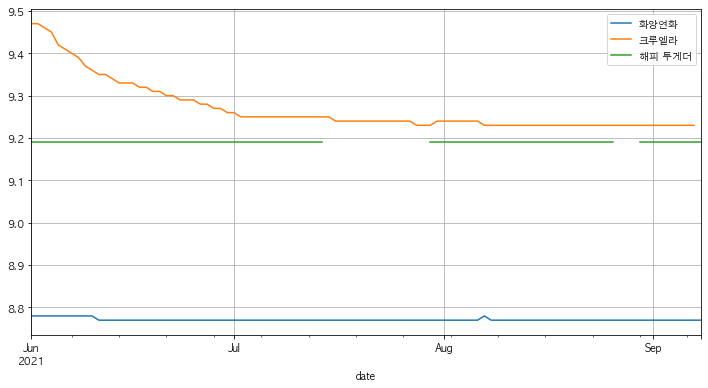

In [22]:
movie_pivot.plot(y=['화양연화', '크루엘라', '해피 투게더'], figsize=(12, 6))
plt.legend(loc='best')
plt.grid()
plt.show()